In [1]:
import numpy as np
import pandas as pd
pd.set_option('display.float_format', lambda x: '%.2f' % x)
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
from pylab import rcParams
rcParams['figure.figsize']=18,8

In [6]:
df = pd.read_csv("3.Pratice set-1 Lok+Sabha_2019.csv")

In [7]:
df.head()

,STATE,CONSTITUENCY,NAME,WINNER,PARTY,SYMBOL,GENDER,CRIMINAL CASES,AGE,CATEGORY,EDUCATION,ASSETS,LIABILITIES,GENERAL VOTES,POSTAL VOTES,TOTAL VOTES,OVER TOTAL ELECTORS IN CONSTITUENCY,OVER TOTAL VOTES POLLED IN CONSTITUENCY,TOTAL ELECTORS
0,Telangana,ADILABAD,SOYAM BAPU RAO,1,BJP,Lotus,MALE,52.00,52,ST,Basic Level,3099414.00,231450.00,376892,482,377374,25.33,35.47,1489790
1,Telangana,ADILABAD,Godam Nagesh,0,TRS,Car,MALE,0.00,54,ST,Post Graduate,18477888.00,847000.00,318665,149,318814,21.40,29.96,1489790
2,Telangana,ADILABAD,RATHOD RAMESH,0,INC,Hand,MALE,3.00,52,ST,Basic Level,36491000.00,15300000.00,314057,181,314238,21.09,29.53,1489790
3,Uttar Pradesh,AGRA,Satyapal Singh Baghel,1,BJP,Lotus,MALE,5.00,58,SC,Doctorate,74274036.00,8606522.00,644459,2416,646875,33.38,56.46,1937690
4,Uttar Pradesh,AGRA,Manoj Kumar Soni,0,BSP,Elephant,MALE,0.00,47,SC,Post Graduate,133784385.00,22251891.00,434199,1130,435329,22.47,38.00,1937690


# 1. Which State/UT contributes to the least number of total votes? Which State/UT contributes to the most number of total votes?

In [8]:
df['TOTAL VOTES'].min()

1342

In [9]:
df[df['TOTAL VOTES']==df['TOTAL VOTES'].min()]

,STATE,CONSTITUENCY,NAME,WINNER,PARTY,SYMBOL,GENDER,CRIMINAL CASES,AGE,CATEGORY,EDUCATION,ASSETS,LIABILITIES,GENERAL VOTES,POSTAL VOTES,TOTAL VOTES,OVER TOTAL ELECTORS IN CONSTITUENCY,OVER TOTAL VOTES POLLED IN CONSTITUENCY,TOTAL ELECTORS
1126,Lakshadweep,LAKSHADWEEP,DR. MOHAMMED SADIQUE KP,0,JD(U),Arrow,MALE,0.00,64,ST,Post Graduate,49783111.00,2887460.00,1339,3,1342,2.43,2.85,55189


In [10]:
df[df['TOTAL VOTES']==df['TOTAL VOTES'].max()]

,STATE,CONSTITUENCY,NAME,WINNER,PARTY,SYMBOL,GENDER,CRIMINAL CASES,AGE,CATEGORY,EDUCATION,ASSETS,LIABILITIES,GENERAL VOTES,POSTAL VOTES,TOTAL VOTES,OVER TOTAL ELECTORS IN CONSTITUENCY,OVER TOTAL VOTES POLLED IN CONSTITUENCY,TOTAL ELECTORS
806,Madhya Pradesh,INDORE,SHANKAR LALWANI,1,BJP,Lotus,MALE,2.00,57,GENERAL,Graduate,59038508.00,2106382.00,1066824,1745,1068569,45.46,65.57,2350580


<AxesSubplot:xlabel='TOTAL VOTES', ylabel='STATE'>

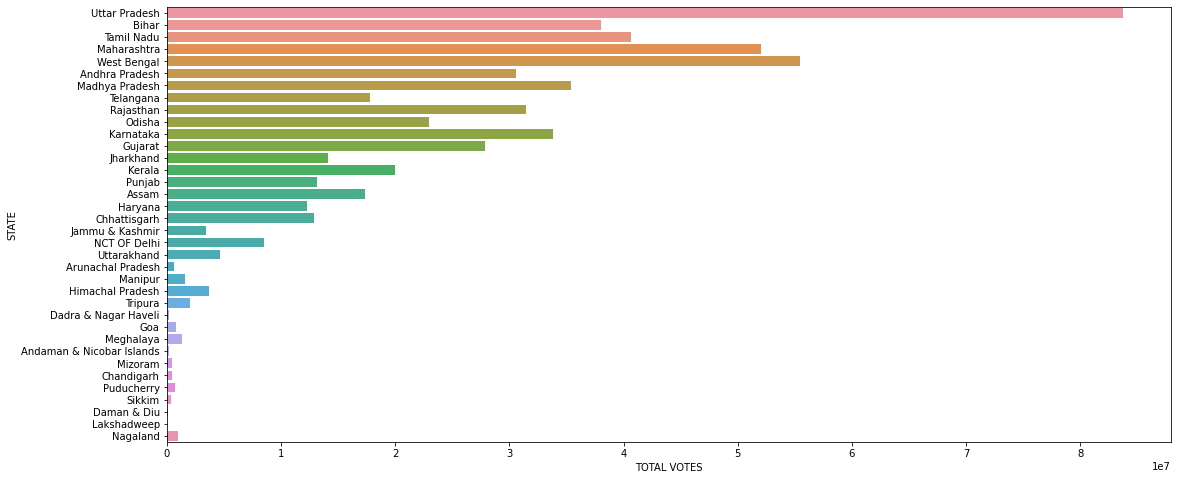

In [13]:
sns.barplot(y=df['STATE'],x=df['TOTAL VOTES'],ci=False,estimator=np.sum,order=df['STATE'].value_counts().index)

# 2. Candidates from which constituency on an average seems to contribute most towards the amount of assets declared? Candidates from which constituency on an average seems to contribute least towards amount of assets declared?

In [15]:
df.head(1)

,STATE,CONSTITUENCY,NAME,WINNER,PARTY,SYMBOL,GENDER,CRIMINAL CASES,AGE,CATEGORY,EDUCATION,ASSETS,LIABILITIES,GENERAL VOTES,POSTAL VOTES,TOTAL VOTES,OVER TOTAL ELECTORS IN CONSTITUENCY,OVER TOTAL VOTES POLLED IN CONSTITUENCY,TOTAL ELECTORS
0,Telangana,ADILABAD,SOYAM BAPU RAO,1,BJP,Lotus,MALE,52.00,52,ST,Basic Level,3099414.00,231450.00,376892,482,377374,25.33,35.47,1489790


In [16]:
df.groupby('CONSTITUENCY')['ASSETS'].mean().sort_values(ascending=True)

CONSTITUENCY
ALATHUR              2165624.67
VILUPPURAM           3032143.33
GAYA (SC)            3796683.45
ALIPURDUARS          3895905.50
BOLPUR               4090779.40
                       ...     
BANGALORE RURAL   1230421937.67
NELLORE           1289469814.67
GUNA              1296719487.00
CHHINDWARA        1655144708.25
CHEVELLA          3927395902.00
Name: ASSETS, Length: 539, dtype: float64

# 3. Consider assets and liabilities. Describe and explain both across the Education level? Provide a detailed justification for your answer.

In [17]:
#Assets
df_assets=df.groupby('EDUCATION')['ASSETS']
df_assets_des=df_assets.describe().T
df_assets_des.loc['Total']=df_assets.sum()
df_assets_des

EDUCATION,Basic Level,Doctorate,Graduate,Illiterate,Post Graduate
count,588.00,73.00,776.00,55.00,503.00
mean,113087357.14,163789131.21,147467337.18,124500820.24,130823318.28
std,339566599.54,470070948.95,478087455.58,232219087.71,394944020.12
min,565.00,177000.00,0.00,0.00,0.00
25%,3000851.00,9770000.00,9909171.25,7262786.00,7944132.00
50%,14935796.50,18988281.00,33282304.00,28350217.00,27182370.00
75%,65860366.50,74274036.00,115810559.75,116754959.00,92760397.50
max,3418643970.00,2508270292.00,8950179170.00,1197313405.00,4174930444.00
Total,66495365996.00,11956606578.00,114434653649.00,6847545113.00,65804129095.00


In [18]:
#Liabilities 
df_Liabilities=df.groupby('EDUCATION')['LIABILITIES']
df_Liabilities_des=df_Liabilities.describe().T
df_Liabilities_des.loc['Total']=df_Liabilities.sum()
df_Liabilities_des

EDUCATION,Basic Level,Doctorate,Graduate,Illiterate,Post Graduate
count,588.00,73.00,777.00,55.00,503.00
mean,21598924.78,8972111.25,18852620.89,19511916.51,21383130.71
std,99416300.01,25885435.30,74590853.58,73095280.61,106208631.07
min,0.00,0.00,0.00,0.00,0.00
25%,0.00,0.00,0.00,0.00,0.00
50%,500000.00,1127000.00,1387000.00,1935504.00,980000.00
75%,4575793.25,2623964.00,7450651.00,7845260.50,6474886.00
max,1350000000.00,137800000.00,1079582000.00,534644785.00,1547511439.00
Total,12700167770.00,654964121.00,14648486430.00,1073155408.00,10755714746.00


# 4. Are there any outliers in assets and liabilities across Education level? Back up your answer with a suitable plot/technique.

Text(0.5, 0, 'Post Graduate')

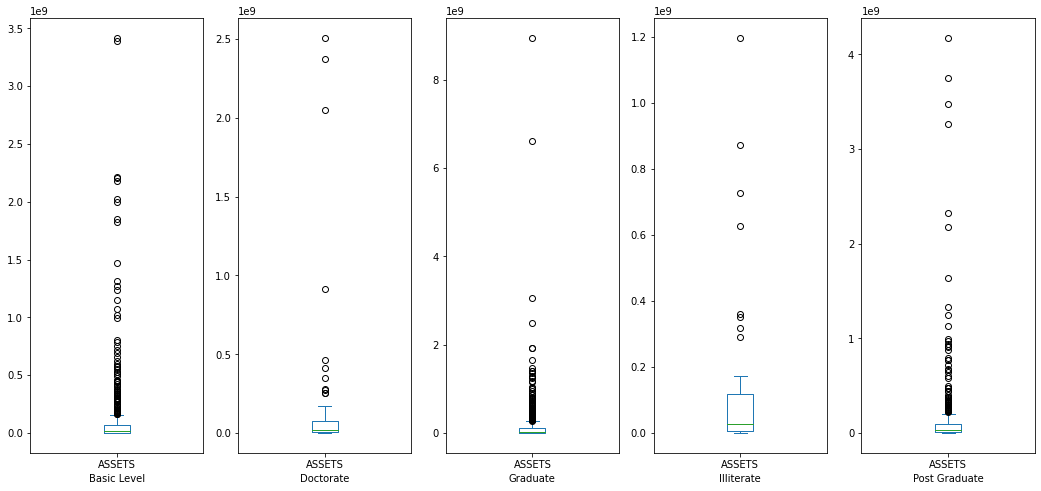

In [19]:

plt.subplot(1,5,1)
df_assets.get_group('Basic Level').plot(kind='box')
plt.xlabel('Basic Level')
plt.subplot(1,5,2)
df_assets.get_group('Doctorate').plot(kind='box')
plt.xlabel('Doctorate')
plt.subplot(1,5,3)
df_assets.get_group('Graduate').plot(kind='box')
plt.xlabel('Graduate')
plt.subplot(1,5,4)
df_assets.get_group('Illiterate').plot(kind='box')
plt.xlabel('Illiterate')
plt.subplot(1,5,5)
df_assets.get_group('Post Graduate').plot(kind='box')
plt.xlabel('Post Graduate')





Text(0.5, 0, 'Post Graduate')

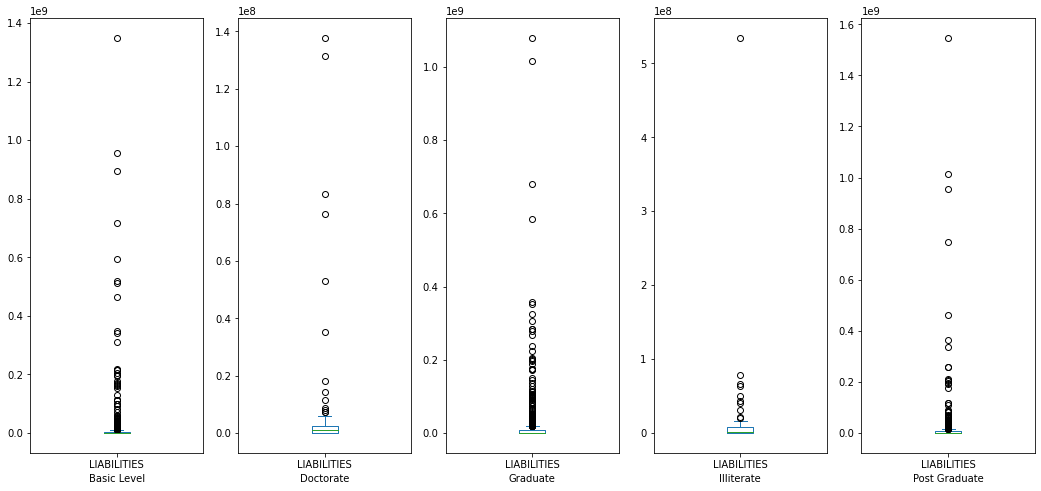

In [20]:
plt.subplot(1,5,1)
df_Liabilities.get_group('Basic Level').plot(kind='box')
plt.xlabel('Basic Level')
plt.subplot(1,5,2)
df_Liabilities.get_group('Doctorate').plot(kind='box')
plt.xlabel('Doctorate')
plt.subplot(1,5,3)
df_Liabilities.get_group('Graduate').plot(kind='box')
plt.xlabel('Graduate')
plt.subplot(1,5,4)
df_Liabilities.get_group('Illiterate').plot(kind='box')
plt.xlabel('Illiterate')
plt.subplot(1,5,5)
df_Liabilities.get_group('Post Graduate').plot(kind='box')
plt.xlabel('Post Graduate')

# 5. On the basis of the descriptive measure of variability, candidates with what education level shows the most and the least inconsistent behavior in the declared assets?

In [21]:
df_assets_des.loc['CV']=df_assets_des.loc['std']/df_assets_des.loc['mean']
df_assets_des

EDUCATION,Basic Level,Doctorate,Graduate,Illiterate,Post Graduate
count,588.00,73.00,776.00,55.00,503.00
mean,113087357.14,163789131.21,147467337.18,124500820.24,130823318.28
std,339566599.54,470070948.95,478087455.58,232219087.71,394944020.12
min,565.00,177000.00,0.00,0.00,0.00
25%,3000851.00,9770000.00,9909171.25,7262786.00,7944132.00
50%,14935796.50,18988281.00,33282304.00,28350217.00,27182370.00
75%,65860366.50,74274036.00,115810559.75,116754959.00,92760397.50
max,3418643970.00,2508270292.00,8950179170.00,1197313405.00,4174930444.00
Total,66495365996.00,11956606578.00,114434653649.00,6847545113.00,65804129095.00
CV,3.00,2.87,3.24,1.87,3.02
